# Mini Project on Employees Data Using PySpark

## Dataset : Delhi Accident Data.csv

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Delhi Accident Data.csv")

In [4]:
df

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,# INJURED,# KILLED,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1,NaN,NaN,NaN
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1,NaN,NaN,NaN
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1156,2008,SOUTH EAST DELHI,UNKNOWN,TSR,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
1157,2017,NEW DELHI,PVT CAR,CYCLE,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
1158,2017,SOUTH WEST DELHI,MIN.BUS,S/C & M/C,FATAL ACCIDENT,0,1,NaN,NaN,NaN
1159,2017,SOUTH WEST DELHI,ERCAW,SELF,SIMPLE ACCIDENT,2,0,NaN,NaN,NaN


In [10]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   YEAR          DISTRICT VEHICLE AT FAULT      VICTIM TYPE OF ACCIDENT  \
0  2008  NORTH WEST DELHI          UNKNOWN         CAR   FATAL ACCIDENT   
1  2008  NORTH WEST DELHI          UNKNOWN       CYCLE  SIMPLE ACCIDENT   
2  2008         NEW DELHI          HTV/GDS  PEDESTRIAN   FATAL ACCIDENT   
3  2008        EAST DELHI          S/C&M/C  PEDESTRIAN  SIMPLE ACCIDENT   
4  2008          SHAHDARA          S/C&M/C  PEDESTRIAN  SIMPLE ACCIDENT   

   # INJURED  # KILLED   Unnamed: 7  Unnamed: 8 Unnamed: 9  
0          0          1         NaN         NaN        NaN  
1          1          0         NaN         NaN        NaN  
2          0          1         NaN         NaN        NaN  
3          1          0         NaN         NaN        NaN  
4          1          0         NaN         NaN        NaN  


In [12]:
print("\\nDataset Info:")
print(df.info())

\nDataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              1161 non-null   int64  
 1   DISTRICT          1161 non-null   object 
 2   VEHICLE AT FAULT  1161 non-null   object 
 3   VICTIM            1161 non-null   object 
 4   TYPE OF ACCIDENT  1161 non-null   object 
 5   # INJURED         1161 non-null   int64  
 6   # KILLED          1161 non-null   int64  
 7   Unnamed: 7        0 non-null      float64
 8   Unnamed: 8        0 non-null      float64
 9   Unnamed: 9        1 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 90.8+ KB
None


In [13]:
print("\\nMissing Values:")
print(df.isnull().sum())

\nMissing Values:
YEAR                   0
DISTRICT               0
VEHICLE AT FAULT       0
VICTIM                 0
TYPE OF ACCIDENT       0
# INJURED              0
# KILLED               0
Unnamed: 7          1161
Unnamed: 8          1161
Unnamed: 9          1160
dtype: int64


In [14]:
print("\\nSummary Statistics:")
print(df.describe())

\nSummary Statistics:
              YEAR    # INJURED    # KILLED   Unnamed: 7  Unnamed: 8
count  1161.000000  1161.000000  1161.000000         0.0         0.0
mean   2008.031008     0.888889     0.224806         NaN         NaN
std       0.527587     0.954421     0.437790         NaN         NaN
min    2008.000000     0.000000     0.000000         NaN         NaN
25%    2008.000000     0.000000     0.000000         NaN         NaN
50%    2008.000000     1.000000     0.000000         NaN         NaN
75%    2008.000000     1.000000     0.000000         NaN         NaN
max    2017.000000    21.000000     4.000000         NaN         NaN


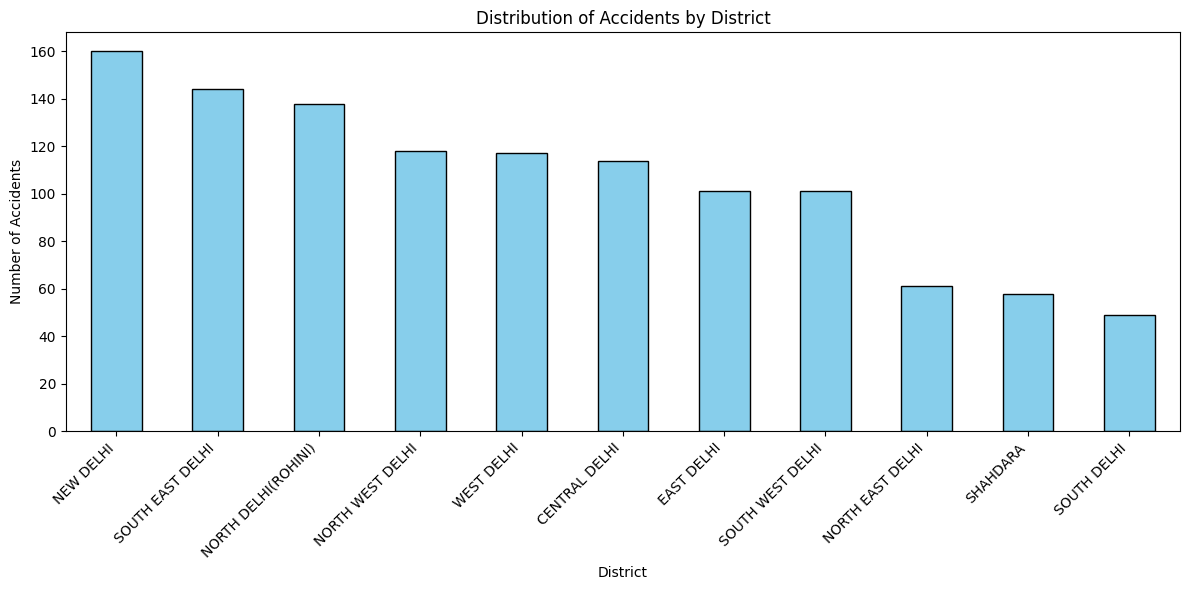

In [15]:
# 1. Distribution of Accidents by District
plt.figure(figsize=(12, 6))
df['DISTRICT'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Accidents by District")
plt.xlabel("District")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

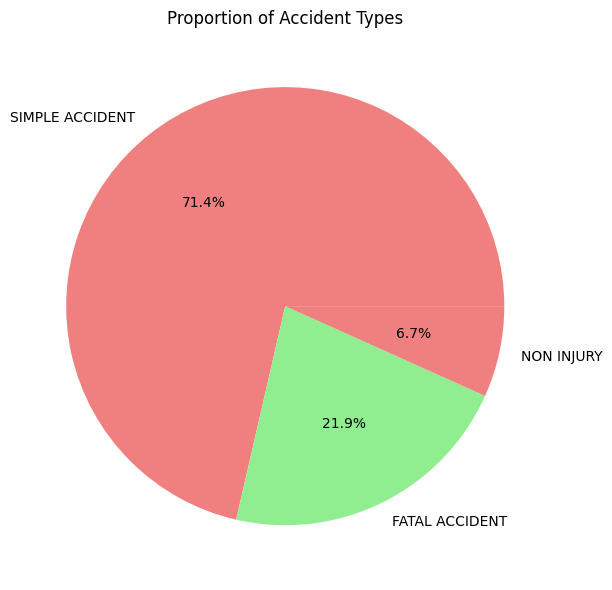

In [16]:
# 2. Distribution of Accident Types
plt.figure(figsize=(10, 6))
df['TYPE OF ACCIDENT'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Proportion of Accident Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

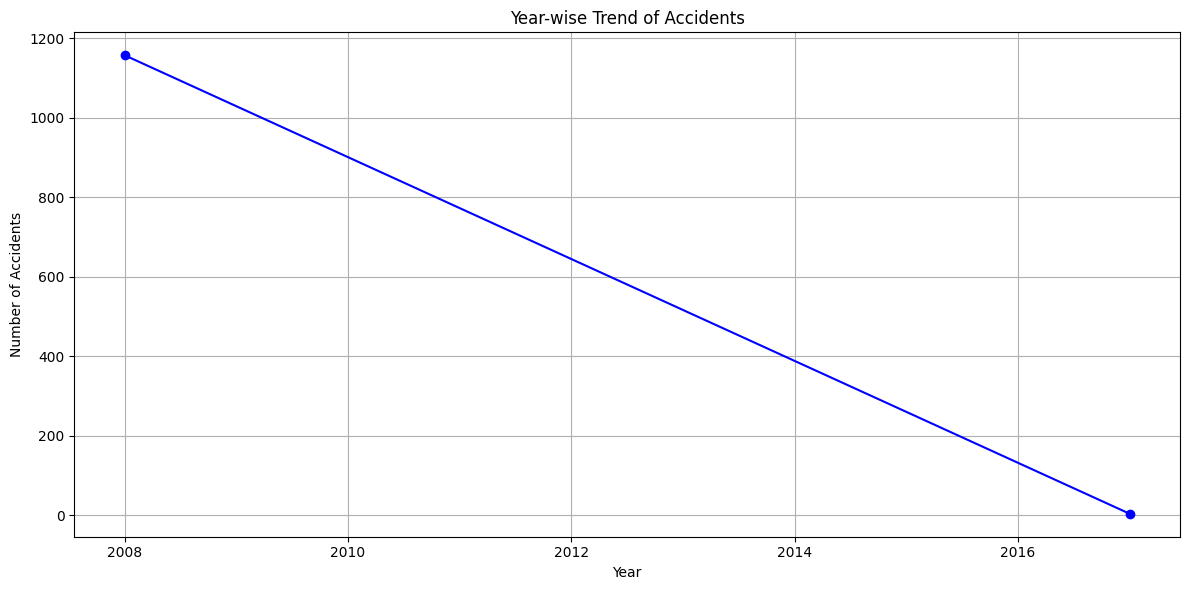

In [17]:
# 3. Year-wise Trend of Accidents
plt.figure(figsize=(12, 6))
df['YEAR'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title("Year-wise Trend of Accidents")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Strip whitespace from columns (if any)
df.columns = df.columns.str.strip()

# Now calculate totals
injured_total = df['# INJURED'].sum()
killed_total = df['# KILLED'].sum()

print(f"\nTotal Injured: {injured_total}")
print(f"Total Killed: {killed_total}")



Total Injured: 1032
Total Killed: 261


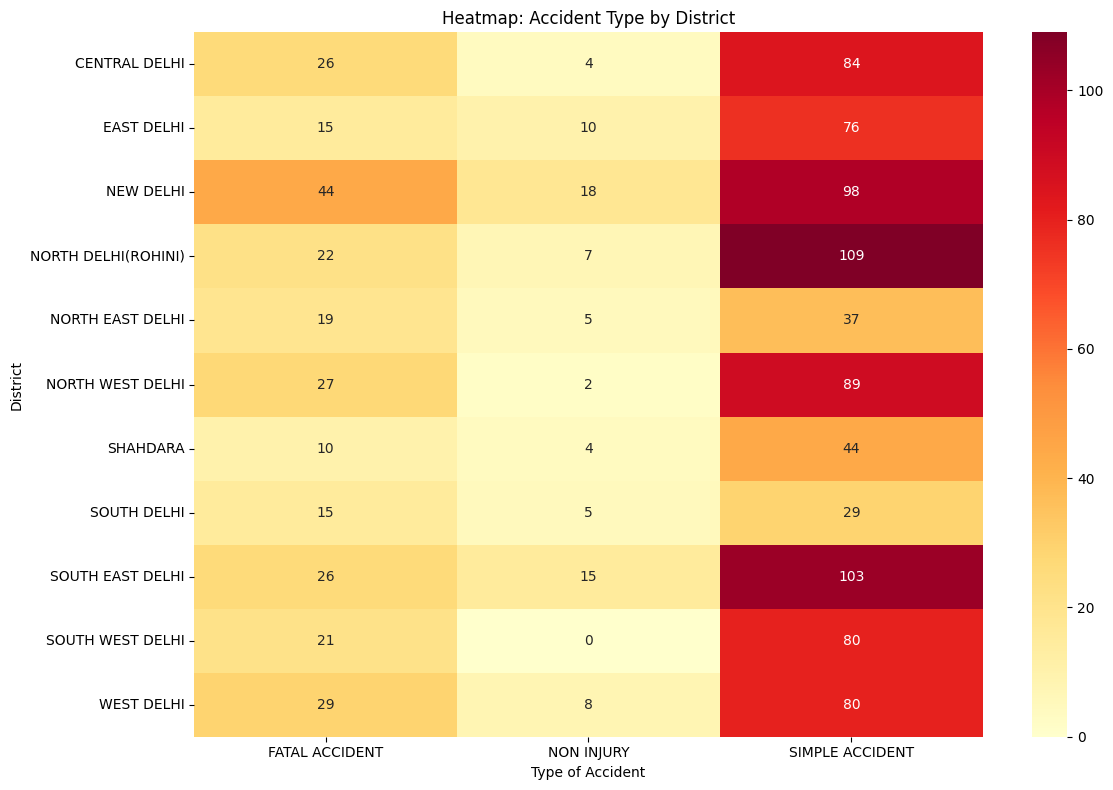

In [26]:
# 5. Heatmap: District vs Type of Accident
heatmap_data = pd.crosstab(df['DISTRICT'], df['TYPE OF ACCIDENT'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Heatmap: Accident Type by District")
plt.xlabel("Type of Accident")
plt.ylabel("District")
plt.tight_layout()
plt.show()

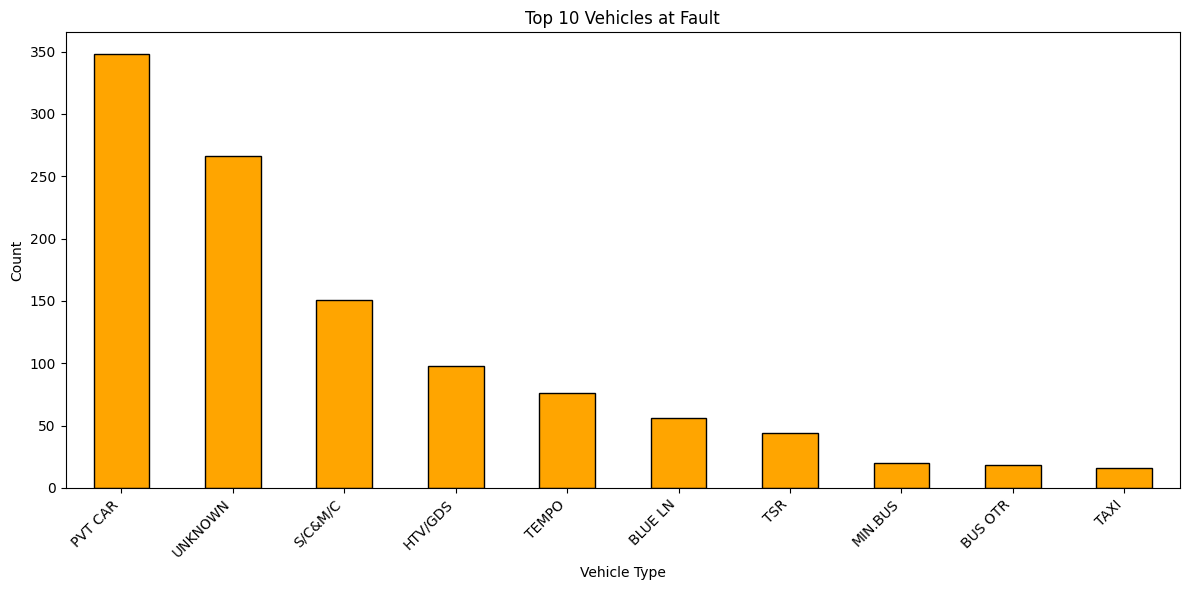

In [27]:
# 6. Vehicle at Fault Distribution
plt.figure(figsize=(12, 6))
top_vehicles = df['VEHICLE AT FAULT'].value_counts().head(10)  # Top 10 vehicles
top_vehicles.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Vehicles at Fault")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

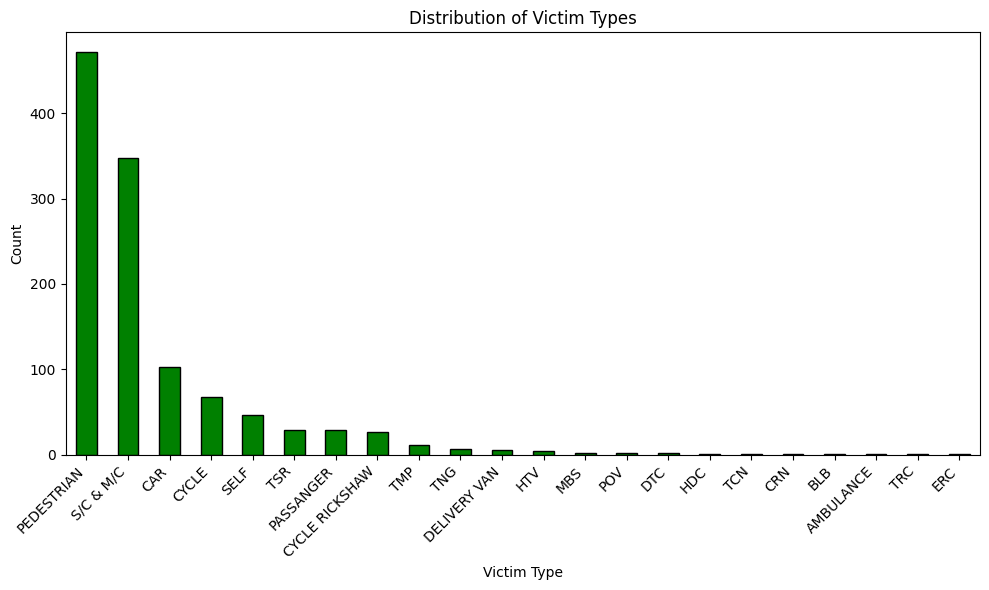

In [28]:
# 7. Victim Type Distribution
plt.figure(figsize=(10, 6))
df['VICTIM'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title("Distribution of Victim Types")
plt.xlabel("Victim Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

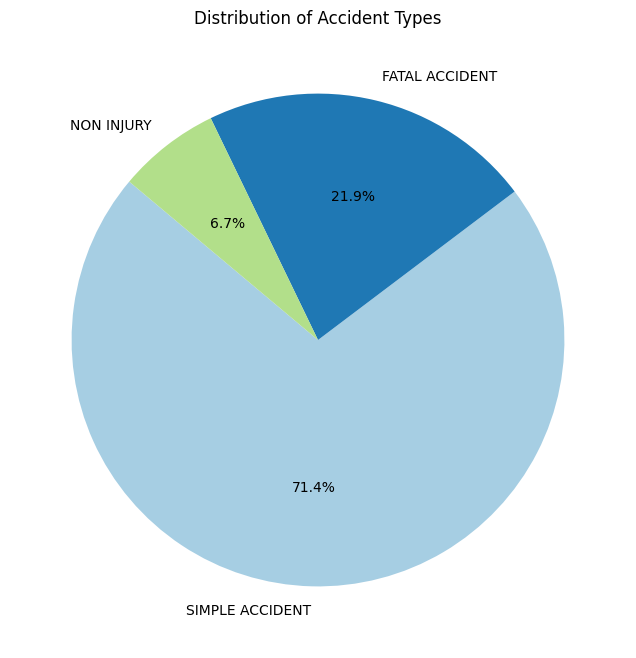

In [29]:
# Pie Chart: Distribution of Accident Types
accident_types = df['TYPE OF ACCIDENT'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(accident_types, labels=accident_types.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Accident Types")
plt.show()

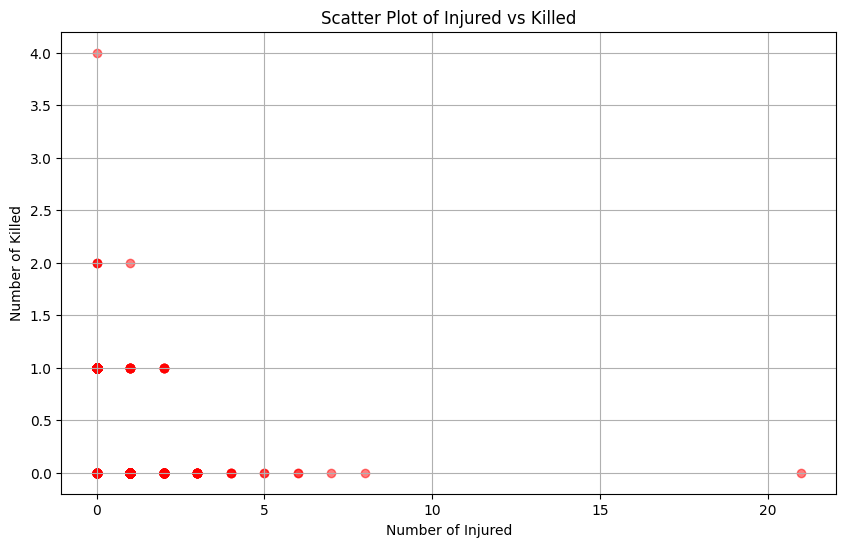

In [31]:
# Scatter Plot: Injured vs Killed in accidents
plt.figure(figsize=(10,6))
plt.scatter(df['# INJURED'], df['# KILLED'], alpha=0.5, color="red")
plt.title("Scatter Plot of Injured vs Killed")
plt.xlabel("Number of Injured")
plt.ylabel("Number of Killed")
plt.grid(True)
plt.show()

In [42]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("DelhiAccident").getOrCreate()

file_path = "file:///C:/Users/ROHITHA/Downloads/DelhiCrime/Delhi Accident Data.csv"

df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

df.show(5)


+----+----------------+----------------+----------+----------------+---------+---------+----+----+----+
|YEAR|        DISTRICT|VEHICLE AT FAULT|    VICTIM|TYPE OF ACCIDENT|# INJURED|# KILLED | _c7| _c8| _c9|
+----+----------------+----------------+----------+----------------+---------+---------+----+----+----+
|2008|NORTH WEST DELHI|         UNKNOWN|       CAR|  FATAL ACCIDENT|        0|        1|NULL|NULL|NULL|
|2008|NORTH WEST DELHI|         UNKNOWN|     CYCLE| SIMPLE ACCIDENT|        1|        0|NULL|NULL|NULL|
|2008|       NEW DELHI|         HTV/GDS|PEDESTRIAN|  FATAL ACCIDENT|        0|        1|NULL|NULL|NULL|
|2008|      EAST DELHI|         S/C&M/C|PEDESTRIAN| SIMPLE ACCIDENT|        1|        0|NULL|NULL|NULL|
|2008|        SHAHDARA|         S/C&M/C|PEDESTRIAN| SIMPLE ACCIDENT|        1|        0|NULL|NULL|NULL|
+----+----------------+----------------+----------+----------------+---------+---------+----+----+----+
only showing top 5 rows


In [43]:
# ------------------------------
# 1. Total number of accident records
# ------------------------------
print("Total number of accident records:", df.count())


Total number of accident records: 1161


In [45]:
# ------------------------------
# 2. Total number of distinct districts
# ------------------------------
print("Total number of districts:", df.select("DISTRICT").distinct().count())


Total number of districts: 11


In [48]:
# ------------------------------
# 3. Distinct district names
# ------------------------------
print("District names:")
df.select("DISTRICT").distinct().show(truncate=False)


District names:
+-------------------+
|DISTRICT           |
+-------------------+
|NEW DELHI          |
|SOUTH EAST DELHI   |
|NORTH EAST DELHI   |
|SOUTH WEST DELHI   |
|NORTH WEST DELHI   |
|WEST DELHI         |
|SHAHDARA           |
|EAST DELHI         |
|SOUTH DELHI        |
|NORTH DELHI(ROHINI)|
|CENTRAL DELHI      |
+-------------------+



In [49]:
# ------------------------------
# 4. Total number of accident records in each district
# ------------------------------
print("Accident records in each district:")
df.groupBy("DISTRICT").count().show()


Accident records in each district:
+-------------------+-----+
|           DISTRICT|count|
+-------------------+-----+
|          NEW DELHI|  160|
|   SOUTH EAST DELHI|  144|
|   NORTH EAST DELHI|   61|
|   SOUTH WEST DELHI|  101|
|   NORTH WEST DELHI|  118|
|         WEST DELHI|  117|
|           SHAHDARA|   58|
|         EAST DELHI|  101|
|        SOUTH DELHI|   49|
|NORTH DELHI(ROHINI)|  138|
|      CENTRAL DELHI|  114|
+-------------------+-----+



In [50]:
# ------------------------------
# 5. Total number of accident records in each year
# ------------------------------
print("Accident records in each year:")
df.groupBy("YEAR").count().show()


Accident records in each year:
+----+-----+
|YEAR|count|
+----+-----+
|2008| 1157|
|2017|    4|
+----+-----+



In [51]:
# ------------------------------
# 6. Total number of accident records in each year in each district
# ------------------------------
print("Accident records in each year in each district:")
df.groupBy("YEAR", "DISTRICT").count().show()


Accident records in each year in each district:
+----+-------------------+-----+
|YEAR|           DISTRICT|count|
+----+-------------------+-----+
|2008|   SOUTH EAST DELHI|  144|
|2017|          NEW DELHI|    1|
|2008|          NEW DELHI|  159|
|2008|   NORTH EAST DELHI|   61|
|2008|   SOUTH WEST DELHI|   98|
|2008|           SHAHDARA|   58|
|2008|         EAST DELHI|  101|
|2008|   NORTH WEST DELHI|  118|
|2008|      CENTRAL DELHI|  114|
|2017|   SOUTH WEST DELHI|    3|
|2008|NORTH DELHI(ROHINI)|  138|
|2008|         WEST DELHI|  117|
|2008|        SOUTH DELHI|   49|
+----+-------------------+-----+



In [57]:
from pyspark.sql.functions import avg, col

# Calculate average injured in NORTH DELHI
nd_avg_injured = df.filter(col("DISTRICT") == "NORTH DELHI").agg(avg("INJURED").alias("avg_injured")).collect()[0]["avg_injured"]

print("Accidents in NORTH DELHI with injured count greater than average:")
df.filter((col("DISTRICT") == "NORTH DELHI") & (col("INJURED") > nd_avg_injured)) \
  .select("YEAR", "DISTRICT", "INJURED", "`# KILLED `") \
  .show()


Accidents in NORTH DELHI with injured count greater than average:
+----+--------+-------+---------+
|YEAR|DISTRICT|INJURED|# KILLED |
+----+--------+-------+---------+
+----+--------+-------+---------+



In [66]:
import os
import shutil
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create Spark session
spark = SparkSession.builder \
    .appName("Delhi Accident Data") \
    .config("spark.hadoop.io.nativeio.enabled", "false") \
    .master("local[*]") \
    .getOrCreate()

# Load the dataset (update path accordingly)
input_path = "file:///C:/Users/ROHITHA/Downloads/DelhiCrime/Delhi Accident Data.csv"
df = spark.read.csv(input_path, header=True, inferSchema=True)

# ------------------------------
# 10. Create DF of accident records with injured > 1 and save to file
# ------------------------------
output_dir = "C:/Users/ROHITHA/Downloads/DelhiCrime/Accidents_Injured_Over1_temp"
final_file = "C:/Users/ROHITHA/Downloads/DelhiCrime/Accidents_Injured_Over1.csv"

# Use backticks for column with spaces and special chars
injured_over_1_df = df.filter(col("# INJURED") > 1)

try:
    injured_over_1_df.coalesce(1) \
        .write.option("header", True) \
        .mode("overwrite") \
        .csv(output_dir)

    # Move and rename the part file Spark created
    for file in os.listdir(output_dir):
        if file.startswith("part-") and file.endswith(".csv"):
            part_file = os.path.join(output_dir, file)
            shutil.move(part_file, final_file)
            break

    # Clean up temp directory
    shutil.rmtree(output_dir)

    print(f"✅ Saved accident records with injured > 1 into: {final_file}")

except Exception as e:
    print("⚠️ Spark CSV write failed, falling back to Pandas...", e)
    injured_over_1_df.toPandas().to_csv(final_file, index=False)
    print("✅ Saved accident records with injured > 1 using Pandas fallback.")


⚠️ Spark CSV write failed, falling back to Pandas... An error occurred while calling o526.csv.
: java.net.ConnectException: Call From Ammu/192.168.137.253 to localhost:9000 failed on connection exception: java.net.ConnectException: Connection refused: no further information; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:499)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:480)
	at org.apache.hadoop.net.NetUtils.wrapWithMessage(NetUtils.java:961)
	at org.apache.hadoop.net.NetUtils.wrapException(NetUtils.java:876)
	at org.apache.h

### Conclusion

The dataset reflects a comprehensive view of accident incidents within different districts of Delhi. It indicates varying severity levels with numbers of injured and killed across years and vehicle types. The geographic distribution highlights specific districts with higher accident frequencies and casualties. Such insights are valuable for urban planning, traffic safety measures, and targeted interventions by local authorities. The dataset serves as a strong basis for further analysis on accident trends, risk factors, and public safety enhancements.